In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
human = pd.read_csv('human.csv')
dog = pd.read_csv('dog.csv')
chimp = pd.read_csv('chimpanzee.csv')

In [24]:
human

,Sequence,Class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3
...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,0
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,6


In [25]:
def kmers(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [26]:
human["human_kmers"] = human["Sequence"].apply(kmers)
dog["dog_kmers"] = dog["Sequence"].apply(kmers)
chimp["chimp_kmers"] = chimp["Sequence"].apply(kmers)

In [27]:
human.drop("Sequence", axis = 1, inplace = True)
dog.drop("Sequence", axis = 1, inplace = True)
chimp.drop("Sequence", axis = 1, inplace = True)

In [28]:
human

,Class,human_kmers
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."
...,...,...
4375,0,"[atggaa, tggaag, ggaaga, gaagat, aagatt, agatt..."
4376,6,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct..."
4377,6,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct..."
4378,6,"[atgggg, tggggc, ggggca, gggcac, ggcacc, gcacc..."


In [29]:
human_text = list(human["human_kmers"].values)
dog_text = list(dog["dog_kmers"].values)
chimp_text = list(chimp["chimp_kmers"].values)

In [30]:
for i in range(len(human_text)):
    human_text[i] = " ".join(human_text[i])


In [31]:
for i in range(len(dog_text)):
    dog_text[i] = " ".join(dog_text[i])

In [32]:
for i in range(len(chimp_text)):
    chimp_text[i] = " ".join(chimp_text[i])

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(4,4))


In [34]:
X_human = vectorizer.fit_transform(human_text)
X_dog = vectorizer.transform(dog_text)
X_chimp = vectorizer.transform(chimp_text)

In [35]:
X_human.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
y_human = human["Class"].values
y_dog = dog["Class"].values
y_chimp = chimp["Class"].values

In [37]:
y_human

array([4, 4, 3, ..., 6, 6, 6])

# **EVALUATION ON HUMAN DATASET**

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_human, y_human, test_size = 0.2, random_state = 0)

# kNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred_human_kNN = KNN.predict(X_test)

In [41]:
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report
print(f"accuracy = {accuracy_score(y_test, y_pred_human_kNN)}")

accuracy = 0.7705479452054794


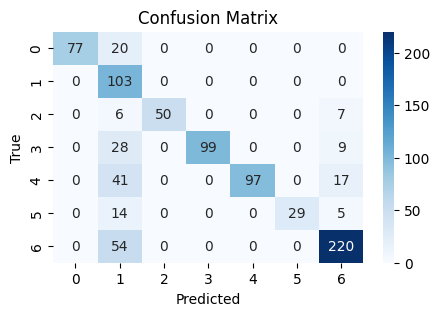

In [42]:
cm = confusion_matrix(y_test, y_pred_human_kNN)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [43]:
report_kNN = classification_report(y_test, y_pred_human_kNN, output_dict=True)
df = pd.DataFrame(report_kNN).transpose()[0:7]
df

,precision,recall,f1-score,support
0,1.000000,0.793814,0.885057,97.0
1,0.387218,1.000000,0.558266,103.0
2,1.000000,0.793651,0.884956,63.0
3,1.000000,0.727941,0.842553,136.0
4,1.000000,0.625806,0.769841,155.0
5,1.000000,0.604167,0.753247,48.0
6,0.852713,0.802920,0.827068,274.0


# Multinomial NAIVE BAYES

In [44]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, y_train)


MultinomialNB()

In [45]:
y_pred_human_nb = NB.predict(X_test)

In [46]:
print(accuracy_score(y_test, y_pred_human_nb))

0.978310502283105


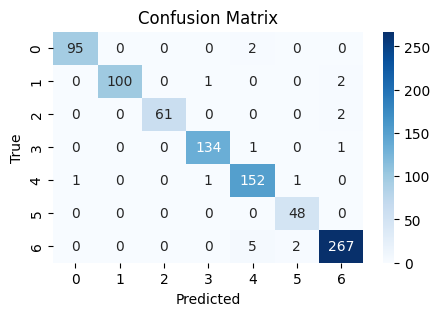

In [47]:
cm = confusion_matrix(y_test, y_pred_human_nb)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [48]:
report_nb = classification_report(y_test, y_pred_human_nb, output_dict=True)
df = pd.DataFrame(report_nb).transpose()[0:7]
df

,precision,recall,f1-score,support
0,0.989583,0.979381,0.984456,97.0
1,1.000000,0.970874,0.985222,103.0
2,1.000000,0.968254,0.983871,63.0
3,0.985294,0.985294,0.985294,136.0
4,0.950000,0.980645,0.965079,155.0
5,0.941176,1.000000,0.969697,48.0
6,0.981618,0.974453,0.978022,274.0


# RANDOM FOREST

In [49]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100)
RF.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
y_pred_human_RF = RF.predict(X_test)

In [51]:
print(accuracy_score(y_test, y_pred_human_RF))

0.906392694063927


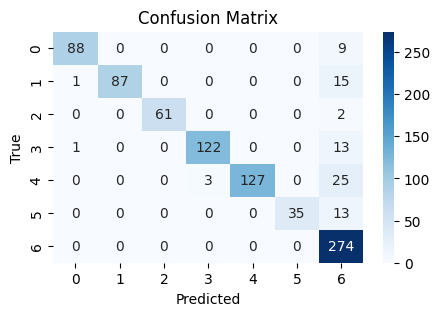

In [52]:
cm = confusion_matrix(y_test, y_pred_human_RF)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [53]:
report_rf = classification_report(y_test, y_pred_human_RF, output_dict=True)
df = pd.DataFrame(report_rf).transpose()[0:7]
df

,precision,recall,f1-score,support
0,0.977778,0.907216,0.941176,97.0
1,1.000000,0.844660,0.915789,103.0
2,1.000000,0.968254,0.983871,63.0
3,0.976000,0.897059,0.934866,136.0
4,1.000000,0.819355,0.900709,155.0
5,1.000000,0.729167,0.843373,48.0
6,0.780627,1.000000,0.876800,274.0


# SVM

In [54]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear')
SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [55]:
y_pred_human_SVM = SVM.predict(X_test)

In [56]:
print(accuracy_score(y_test, y_pred_human_SVM))

0.886986301369863


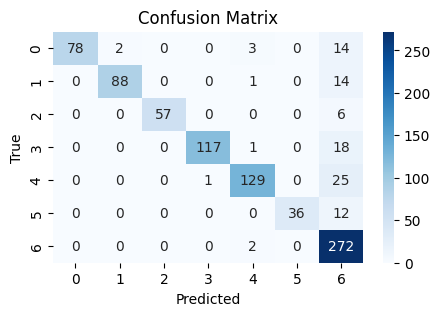

In [57]:
cm = confusion_matrix(y_test, y_pred_human_SVM)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [58]:
report_svm = classification_report(y_test, y_pred_human_SVM, output_dict=True)
df = pd.DataFrame(report_svm).transpose()[0:7]
df

,precision,recall,f1-score,support
0,1.000000,0.804124,0.891429,97.0
1,0.977778,0.854369,0.911917,103.0
2,1.000000,0.904762,0.950000,63.0
3,0.991525,0.860294,0.921260,136.0
4,0.948529,0.832258,0.886598,155.0
5,1.000000,0.750000,0.857143,48.0
6,0.753463,0.992701,0.856693,274.0


# **EVALUATION ON CHIMPANZEE DATASET**

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_chimp, y_chimp, test_size = 0.2, random_state = 0)

# KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [61]:
y_pred_chimp_kNN = KNN.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
print(f"accuracy = {accuracy_score(y_test, y_pred_chimp_kNN)}")

accuracy = 0.7388724035608308


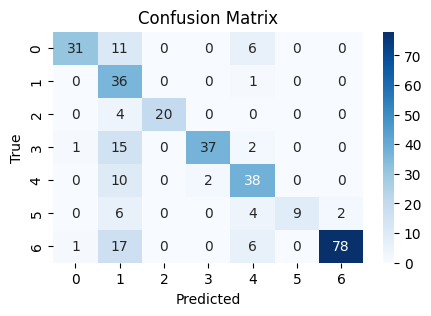

In [63]:
cm = confusion_matrix(y_test, y_pred_chimp_kNN)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [64]:
report_kNN = classification_report(y_test, y_pred_chimp_kNN, output_dict=True)
df = pd.DataFrame(report_kNN).transpose()[0:7]
df

,precision,recall,f1-score,support
0,0.939394,0.645833,0.765432,48.0
1,0.363636,0.972973,0.529412,37.0
2,1.000000,0.833333,0.909091,24.0
3,0.948718,0.672727,0.787234,55.0
4,0.666667,0.760000,0.710280,50.0
5,1.000000,0.428571,0.600000,21.0
6,0.975000,0.764706,0.857143,102.0


# Multinomial NAIVE BAYES

In [65]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, y_train)

MultinomialNB()

In [66]:
y_pred_chimp_nb = NB.predict(X_test)

In [67]:
print(f"accuracy = {accuracy_score(y_test, y_pred_chimp_nb)}")

accuracy = 0.9198813056379822


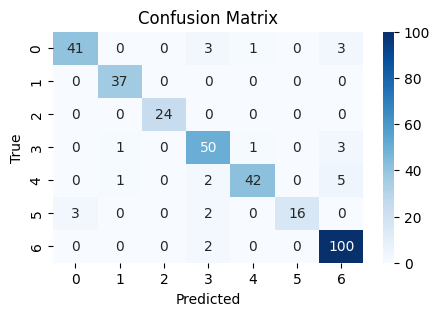

In [68]:
cm = confusion_matrix(y_test, y_pred_chimp_nb)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [69]:
report_nb = classification_report(y_test, y_pred_chimp_nb, output_dict=True)
df = pd.DataFrame(report_nb).transpose()[0:7]
df

,precision,recall,f1-score,support
0,0.931818,0.854167,0.891304,48.0
1,0.948718,1.000000,0.973684,37.0
2,1.000000,1.000000,1.000000,24.0
3,0.847458,0.909091,0.877193,55.0
4,0.954545,0.840000,0.893617,50.0
5,1.000000,0.761905,0.864865,21.0
6,0.900901,0.980392,0.938967,102.0


# RANDOM FOREST

In [70]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100)
RF.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
y_pred_chimp_RF = RF.predict(X_test)

In [72]:
print(f"accuracy = {accuracy_score(y_test, y_pred_chimp_RF)}")

accuracy = 0.8427299703264095


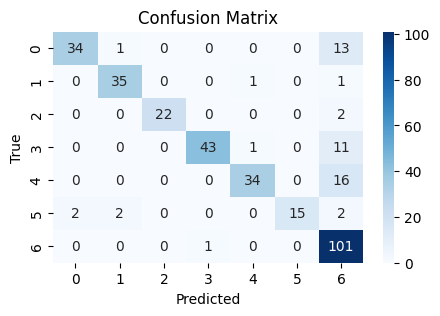

In [73]:
cm = confusion_matrix(y_test, y_pred_chimp_RF)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [74]:
report_rf = classification_report(y_test, y_pred_chimp_RF, output_dict=True)
df = pd.DataFrame(report_rf).transpose()[0:7]
df

,precision,recall,f1-score,support
0,0.944444,0.708333,0.809524,48.0
1,0.921053,0.945946,0.933333,37.0
2,1.000000,0.916667,0.956522,24.0
3,0.977273,0.781818,0.868687,55.0
4,0.944444,0.680000,0.790698,50.0
5,1.000000,0.714286,0.833333,21.0
6,0.691781,0.990196,0.814516,102.0


# SVM

In [75]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear')
SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [76]:
y_pred_chimp_SVM = SVM.predict(X_test)

In [77]:
print(f"accuracy = {accuracy_score(y_test, y_pred_chimp_SVM)}")

accuracy = 0.8694362017804155


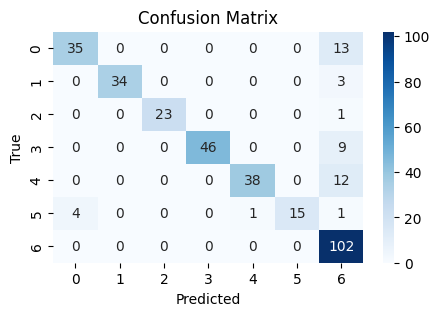

In [78]:
cm = confusion_matrix(y_test, y_pred_chimp_SVM)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [79]:
report_svm = classification_report(y_test, y_pred_chimp_SVM, output_dict=True)
df = pd.DataFrame(report_svm).transpose()[0:7]
df

,precision,recall,f1-score,support
0,0.897436,0.729167,0.804598,48.0
1,1.000000,0.918919,0.957746,37.0
2,1.000000,0.958333,0.978723,24.0
3,1.000000,0.836364,0.910891,55.0
4,0.974359,0.760000,0.853933,50.0
5,1.000000,0.714286,0.833333,21.0
6,0.723404,1.000000,0.839506,102.0


# **EVALUATION ON DOG DATASET**

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dog, y_dog, test_size = 0.2, random_state = 0)

# kNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [82]:
y_pred_dog_kNN = KNN.predict(X_test)

In [83]:
print(f"accuracy = {accuracy_score(y_test, y_pred_dog_kNN)}")

accuracy = 0.5975609756097561


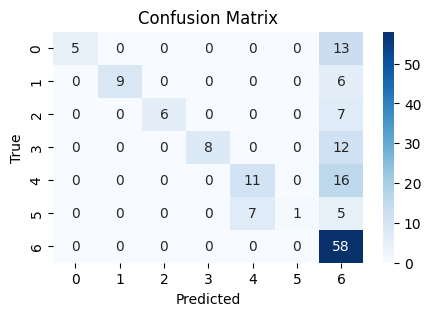

In [84]:
cm = confusion_matrix(y_test, y_pred_dog_kNN)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [85]:
report_kNN = classification_report(y_test, y_pred_dog_kNN, output_dict=True)
df = pd.DataFrame(report_kNN).transpose()[0:7]
df

,precision,recall,f1-score,support
0,1.000000,0.277778,0.434783,18.0
1,1.000000,0.600000,0.750000,15.0
2,1.000000,0.461538,0.631579,13.0
3,1.000000,0.400000,0.571429,20.0
4,0.611111,0.407407,0.488889,27.0
5,1.000000,0.076923,0.142857,13.0
6,0.495726,1.000000,0.662857,58.0


# Multinomial NAIVE BAYES

In [86]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, y_train)

MultinomialNB()

In [87]:
y_pred_dog_nb = NB.predict(X_test)

In [88]:
print(f"accuracy = {accuracy_score(y_test, y_pred_dog_nb)}")

accuracy = 0.7195121951219512


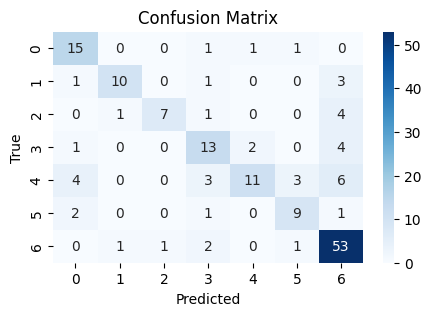

In [89]:
cm = confusion_matrix(y_test, y_pred_dog_nb)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [90]:
report_nb = classification_report(y_test, y_pred_dog_nb, output_dict=True)
df = pd.DataFrame(report_nb).transpose()[0:7]
df

,precision,recall,f1-score,support
0,0.652174,0.833333,0.731707,18.0
1,0.833333,0.666667,0.740741,15.0
2,0.875000,0.538462,0.666667,13.0
3,0.590909,0.650000,0.619048,20.0
4,0.785714,0.407407,0.536585,27.0
5,0.642857,0.692308,0.666667,13.0
6,0.746479,0.913793,0.821705,58.0


# RANDOM FOREST

In [91]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100)
RF.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
y_pred_dog_RF = RF.predict(X_test)

In [93]:
print(f"accuracy = {accuracy_score(y_test, y_pred_dog_RF)}")

accuracy = 0.6524390243902439


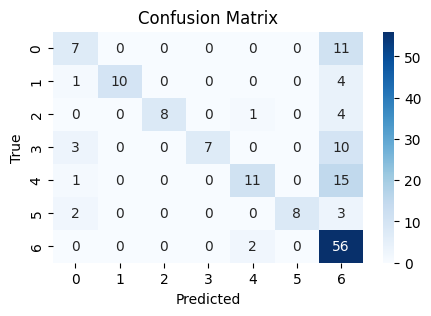

In [94]:
cm = confusion_matrix(y_test, y_pred_dog_RF)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [95]:
report_rf = classification_report(y_test, y_pred_dog_RF, output_dict=True)
df = pd.DataFrame(report_rf).transpose()[0:7]
df

,precision,recall,f1-score,support
0,0.500000,0.388889,0.437500,18.0
1,1.000000,0.666667,0.800000,15.0
2,1.000000,0.615385,0.761905,13.0
3,1.000000,0.350000,0.518519,20.0
4,0.785714,0.407407,0.536585,27.0
5,1.000000,0.615385,0.761905,13.0
6,0.543689,0.965517,0.695652,58.0


# SVM

In [96]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear')
SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [97]:
y_pred_dog_SVM = SVM.predict(X_test)

In [98]:
print(f"accuracy = {accuracy_score(y_test, y_pred_dog_SVM)}")

accuracy = 0.6585365853658537


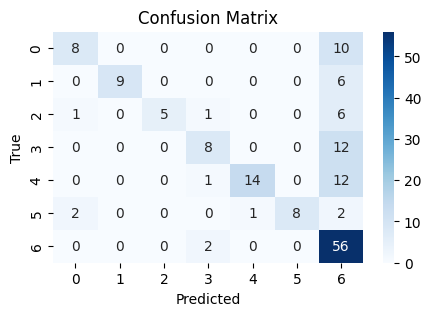

In [99]:
cm = confusion_matrix(y_test, y_pred_dog_SVM)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [100]:
report_svm = classification_report(y_test, y_pred_dog_SVM, output_dict=True)
df = pd.DataFrame(report_svm).transpose()[0:7]
df

,precision,recall,f1-score,support
0,0.727273,0.444444,0.551724,18.0
1,1.000000,0.600000,0.750000,15.0
2,1.000000,0.384615,0.555556,13.0
3,0.666667,0.400000,0.500000,20.0
4,0.933333,0.518519,0.666667,27.0
5,1.000000,0.615385,0.761905,13.0
6,0.538462,0.965517,0.691358,58.0


CONCLUSION:
**Its observed that Naive Bayes gives highest accuracy while Knn has lowest accuracy in all datasets**